In [69]:
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def display(title, img):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

EXERCISE 1

Assignement 1:

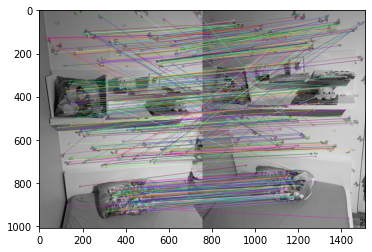

(<matplotlib.image.AxesImage at 0x1f600f52160>, None)

In [70]:
img1 = cv.imread('im00.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('im01.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
pts1 = []
pts2 = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

Assignement 2:

In [71]:

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [72]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

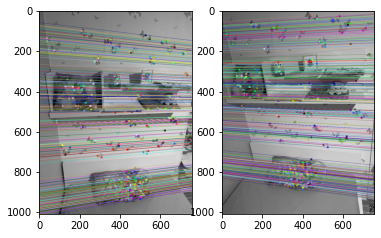

In [73]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

EXERCISE 2

Assignment 3:

In [74]:
C = np.array([[792, 0, 505], [0, 791, 376], [0, 0, 1]])
E = np.transpose(C)@F@C
E

array([[  -1.1199988 ,   51.6412721 ,   -0.82335149],
       [  71.0912745 ,  -20.85312007, -249.55600426],
       [  -1.72140417,  277.05367062,  -19.58393896]])

Assignment 4:

In [75]:
one = np.ones((pts1.shape[0],1))
pts1x = np.append(pts1, one, axis = 1)
pts2x = np.append(pts2, one, axis = 1)
Cacc = np.linalg.inv(C)
norm1 = pts1x@np.transpose(Cacc)
norm2 = pts2x@np.transpose(Cacc)


In [76]:
F2, mask = cv.findFundamentalMat(norm1,norm2,cv.FM_LMEDS)
F2 #met genormaliseerde coordinaten is de F automatisch al de essentiële matrix

array([[  0.07506678,  -2.62221066,   0.0215577 ],
       [ -3.54050581,   1.04028607,  12.67962387],
       [  0.15771237, -14.05749031,   1.        ]])

Question 1: omdat het 2 keer een wiskundige benadering is (SVD)

Assignment 5:

In [81]:
res1 = pts2x@F@np.transpose(pts1x)
np.mean(np.diag(res1))

0.05725345408519058

In [82]:
res2 = norm2@E@np.transpose(norm1)
np.mean(np.diag(res2))

0.057253454085180136

In [83]:
res3 = norm2@F2@np.transpose(norm1)
np.mean(np.diag(res3))

-0.0012797333503264876

Question 2: The reason is that numerical errors and inaccuracies occur in the estimation proces.

Assignment 6:

In [94]:
import math
_,R,t,_ = cv.recoverPose(E, pts1, pts2, C)
R


array([[ 0.89601851,  0.02702982,  0.4431932 ],
       [ 0.00601844,  0.99731432, -0.07299269],
       [-0.4439759 ,  0.06807013,  0.89344941]])

In [102]:
theta = math.acos(R[0,0])
(theta*180)/math.pi

26.360444371200572

In [88]:
t

array([[-0.98315801],
       [-0.01107188],
       [ 0.18242186]])

Question 3: Yes, the y-component stays almost the same, what can be confirmed by the images. The translation in the z-axis is 4 times smaller then the translation in the x-axis. This is also visual in the images.

Question 4: The angle would be 26 degrees. Looking to the images, the 26 degrees rotation looks realistic.